In [ ]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt
import math
import itertools

In [ ]:
# Function for creating a complex-valued Hermitian matrix
def Hermitian(dim):
  matrix = np.zeros((dim, dim), dtype=np.complex_)  # allow complex numbers
  for y in range(0,dim):
    for x in range(0,dim):
      # matrix[x,y] = complex(np.random.uniform(0,1), np.random.uniform(0,1)) # generate random numbers for all slots
      # matrix[x,y] = complex(np.random.uniform(-1,1), np.random.uniform(-1,1)) # generate random numbers for all slots
      # matrix[x,y] = complex(np.random.exponential(), np.random.exponential())
      matrix[x,y] = complex(np.random.normal(), np.random.normal())
  for y in range(0,dim):
    for x in range(0,dim):
      matrix[x,y] = matrix[y,x].conjugate()   # replace the slot [x,y] with conjugate transpose [y*,x*]
  return matrix
print(Hermitian(3))

[[-0.52355402+0.09151882j -0.27802083+0.79041023j -1.85783511-0.25871319j]
 [-0.27802083-0.79041023j  0.44707501-0.33026875j -0.03604901-2.36685338j]
 [-1.85783511+0.25871319j -0.03604901+2.36685338j -0.64676046+1.9083078j ]]


In [ ]:
# Can easily calculate eigenvalues with built-in capabilities
M = Hermitian(15)
eigenvalues, eigenvectors = linalg.eigh(M)
#print(M)
print(eigenvalues)

[-9.19210317 -7.12652082 -5.93721296 -4.66293044 -3.83514538 -2.35445255
 -1.08753944 -0.14157935  0.32515304  1.68962037  3.04576238  3.91537367
  4.68580818  6.55209321  8.42274709]


Model external electric force $E_j = (\sum_{i \neq j} \frac{1}{x_i-x_j})-\frac{x_j}{a^2}$

In [ ]:
def external_el(eigenvalues, index, a):
  combos = list(itertools.combinations(eigenvalues,2))
  # Break up E into two parts: part 1 is the sum of 1/(xj-xi)
  part1 = 0
  for x in combos:
    part1 += 1/(x[1]-x[0])
  # part 2 is the xj/a^2 term
  part2 = eigenvalues[index]/a/a
  return part1 - part2

force = []
for x in range(len(eigenvalues)):
  force.append(external_el(eigenvalues, x, 25))

#print(force)

Model first moments according to $f \langle \delta x_j \rangle = E(x_j)\delta t$. Second moments are $f \langle (\delta x_j)^2 \rangle = 2kT \delta t$.

In [ ]:
# Moments
def FirstMoment(eigenvalues, a, friction, time):
  force = []
  for x in range(len(eigenvalues)):
    force.append(external_el(eigenvalues, x, a))
  mom = [x*time/friction for x in force]
  return mom

def SecondMoment(kT, friction, time):
  return kT*time/friction

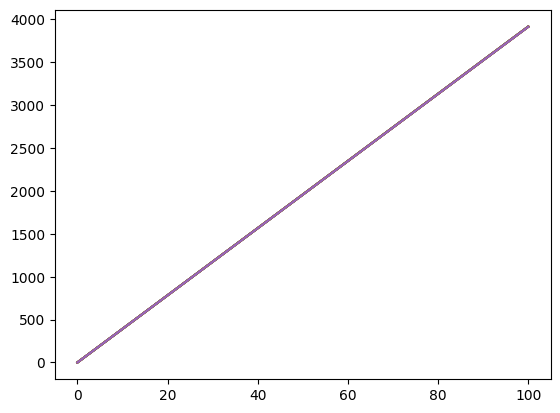

In [ ]:
# plot moments in time

time = np.linspace(0,100, 500)
m1 = []
m2 = []
for t in time:
  m1.append(FirstMoment(eigenvalues, 25, 0.8, t))
  m2.append(SecondMoment(0.5, 0.8, t))

m1 = np.array(m1)
plt.plot(time, m1, label='m1')
# plt.plot(time, m2, label='m2')
# plt.legend()

(500, 15)
[3917.59622361 3917.18310714 3916.94524557 3916.69038907 3916.52483205
 3916.22869349 3915.97531087 3915.78611885 3915.69277237 3915.4198789
 3915.1486505  3914.97472824 3914.82064134 3914.44738434 3914.07325356]


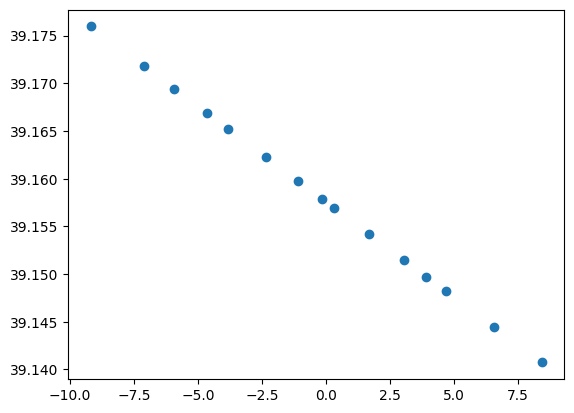

In [ ]:
print(m1.shape)
print(m1[-1])
M1 = m1[-1]/max(time)
plt.scatter(eigenvalues, M1)

KeyboardInterrupt: 

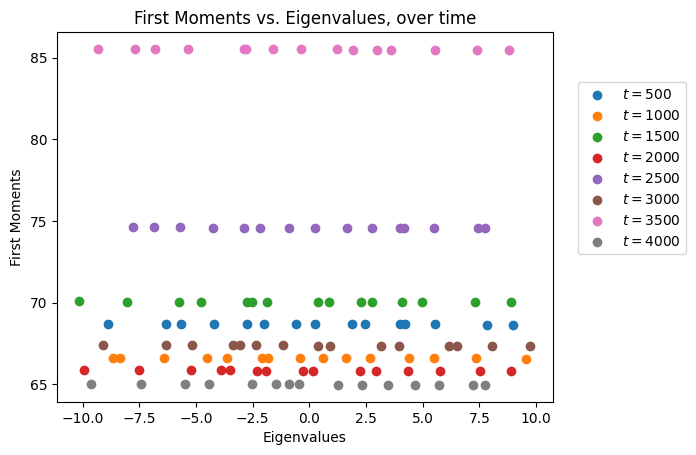

In [ ]:
# plot eigenvalues vs moments over time

def full_process(size, a, friction, stoptime, label):
  matrix = Hermitian(size)
  eigenvalues = linalg.eigvalsh(matrix)
  force = []
  time = np.linspace(0,stoptime,500)
  m1 = []
  for i in time:
    m1.append(FirstMoment(eigenvalues, a, friction, i))
  M1 = np.array(m1[-1]/max(time))
  # print(max(M1)-min(M1))
  plt.scatter(eigenvalues, M1, label=label)
  plt.xlabel('Eigenvalues')
  plt.ylabel('First Moments')
  plt.title('First Moments vs. Eigenvalues, over time')
  plt.legend(loc=(1.05,0.4))
  return plt

#full_process(15, 25, 0.8, 500)
for x in range(10):
  full_process(15, 25, 0.5, (x+1)*500, '$t = '+str((x+1)*500)+'$')

In [ ]:
# plot eigenvalues vs moments over time, v2

def full_process(size, a, friction, stoptime, label):
  matrix = Hermitian(size)
  eigenvalues = linalg.eigvalsh(matrix)
  force = []
  time = np.linspace(0,stoptime,500)
  m1 = []
  # for i in time:
  #   m1.append(FirstMoment(eigenvalues, a, friction, i))
  M1 = FirstMoment(eigenvalues, a, friction, 0.001)
  # print(max(M1)-min(M1))
  # plt.scatter(eigenvalues, M1, label=label)
  # plt.xlabel('Eigenvalues')
  # plt.ylabel('First Moments')
  # plt.title('First Moments vs. Eigenvalues, over time')
  # plt.legend(loc=(1.05,0.4))
  return M1

#full_process(15, 25, 0.8, 500)
for x in range(10):
  print(full_process(15, 25, 0.5, (x+1)*500, '$t = '+str((x+1)*500)+'$'))
  plt.plot()

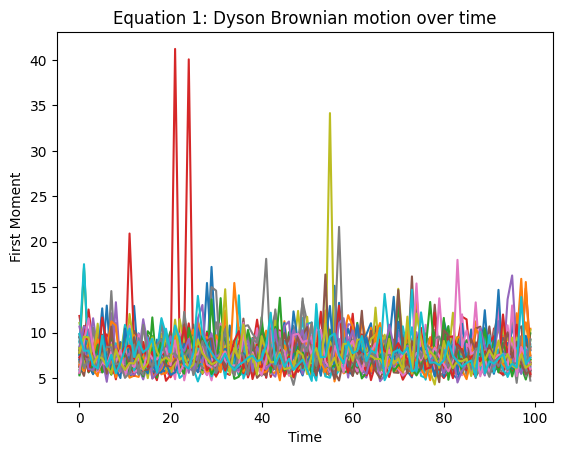

In [ ]:
# graph moments over time according to equation 1

size = 5

def pr(eigs):
  def full_process(eigenvalues, a, friction, stoptime, label):
    force = []
    time = np.linspace(0,stoptime,500)
    m1 = []
    for i in time:
      m1.append(FirstMoment(eigenvalues, a, friction, i))
    M1 = np.array(m1[-1]/max(time))
    return M1

  trials = 100
  M1_list = np.zeros((trials, size))
  for x in range(trials):
    M1_list[x] = full_process(linalg.eigvalsh(Hermitian(size)), 25, 0.5, (x+1)*500, '$t = '+str((x+1)*500)+'$')

  x = np.random.randint(0,size)
  plt.plot(M1_list[:,x])
  plt.xlabel('Time')
  plt.ylabel('First Moment')
  plt.title('Equation 1: Dyson Brownian motion over time')

for i in range(40):
  pr(Hermitian(size))

In [ ]:
# plot eigenvalues and moments with varying friction

def full_process(size, a, friction, stoptime, label):
  matrix = Hermitian(size)
  eigenvalues = linalg.eigvalsh(matrix)
  force = []
  time = np.linspace(0,stoptime,500)
  m1 = []
  for i in time:
    m1.append(FirstMoment(eigenvalues, a, friction, i))
  M1 = np.array(m1[-1]/max(time))
  print(max(M1)-min(M1))
  plt.scatter(eigenvalues, M1, label=label)
  plt.xlabel('Eigenvalues')
  plt.ylabel('First Moments')
  plt.title('First Moments vs. Eigenvalues, variable friction')
  plt.legend(ncols = 2, loc = (0.5, 0.5))
  return plt

for x in range(10):
  full_process(15, 25, 1-x/10, 1000, '$f = '+str(np.round(1-x/10,1))+'$')

0.026004261074540125
0.030708872827666767
0.03646410211000273
0.045809396538075475
0.05495376817304276
0.06398446380332956
0.07537822237469527
0.09355052077785331
0.1578705686366959
0.2937024724992625
Error in callback <function flush_figures at 0x7ebe7dd491b0> (for post_execute):


KeyboardInterrupt: 

Model the other set of equations for a Dyson gas: $P_0^{(i)} = 0$, $P_{t+dt}^{(i)} = P_t^{(i)} + \sqrt{\frac{2}{D}dt}*𝒩(0,1) + \frac{1}{D}\sum_{j=1}^D \frac{1}{P_t^{(i)}-P_t^{(j)}}$, where $P_t^{(i)}$ describes a process for the $i$th particle, $D$ is the number of dimensions, and $𝒩(0,1)$ is the standard normal distribution.

In [ ]:
dt = 0.00001
dims = 50
num = 2000

p = np.zeros((dims,num))
#print(p)
for j in range(1,dims):
  for i in range(1,num):
    if sum(1/(p[j,i-1]-p[:,i-1])) == np.nan or np.inf:
      p[j,i] = p[j,i-1]+np.sqrt(2*dt/dims)*np.random.normal()
    else:
      p[j,i] = p[j,i-1]+np.sqrt(2*dt/dims)*np.random.normal()+sum(1/(p[j,i-1]-p[:,i-1]))/dims

print(p)

<ipython-input-30-621cb05e0ba3>:9: RuntimeWarning: divide by zero encountered in divide
  if sum(1/(p[j,i-1]-p[:,i-1])) == np.nan or np.inf:


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.82021329e-05 -4.82723409e-04 ...  2.87324059e-02
   2.82514985e-02  2.80473349e-02]
 [ 0.00000000e+00  1.04365900e-03  9.48055928e-04 ...  4.38362605e-02
   4.38627805e-02  4.33470931e-02]
 ...
 [ 0.00000000e+00 -1.01202746e-03 -1.48153298e-03 ... -1.87162213e-02
  -2.02267810e-02 -2.04361585e-02]
 [ 0.00000000e+00  4.95669675e-04  6.77824362e-04 ...  3.42503013e-02
   3.45555148e-02  3.45412363e-02]
 [ 0.00000000e+00 -2.46610395e-04 -1.02738369e-03 ... -9.16296508e-03
  -9.05152696e-03 -9.07118752e-03]]


Text(0.5, 1.0, 'Equation 2: Dyson Brownian motion over time')

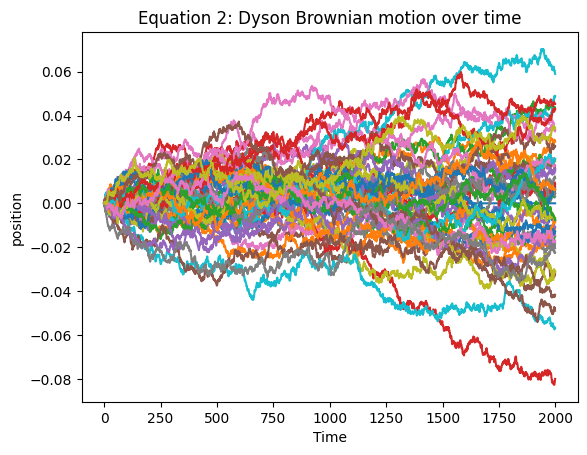

In [ ]:
# plotting the model

for x in range(dims-1):
  plt.plot(p[x,:])

plt.xlabel('Time')
plt.ylabel('position')
plt.title('Equation 2: Dyson Brownian motion over time')
#plt.yscale('log')